In [37]:
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# $\color{red}{\text{EDA & Text Preprocessing}}$

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv("complaints.csv")

# show the first few rows of the dataset
print(df.head())


#drop complaint_no column as it is of no use
df.drop('complaint_no',axis='columns',inplace=True)  # Assuming 'complaint_no' is irrelevant

# Check for missing values
print(df.isnull().sum())

# Handle missing values
df = df.dropna().reset_index(drop=True)
df.info()
df['narrative']  # Drop rows with missing values


# Handle missing or null values
print(df.isnull().sum())
df.shape

   complaint_no           product  \
0             0       credit_card   
1             1       credit_card   
2             2    retail_banking   
3             3  credit_reporting   
4             4  credit_reporting   

                                           narrative  
0  purchase order day shipping amount receive pro...  
1  forwarded message date tue subject please inve...  
2  forwarded message cc sent friday pdt subject f...  
3  payment history missing credit report speciali...  
4  payment history missing credit report made mis...  
product       0
narrative    10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162411 entries, 0 to 162410
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB
product      0
narrative    0
dtype: int64


(162411, 2)

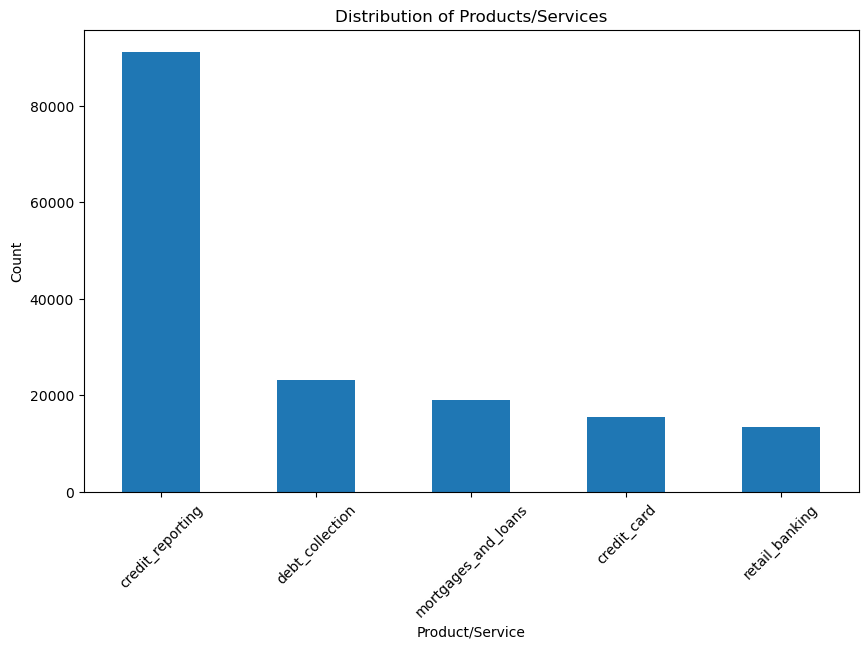

In [39]:
import matplotlib.pyplot as plt

# Count the occurrences of each product/service
product_counts = df['product'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products/Services')
plt.xlabel('Product/Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

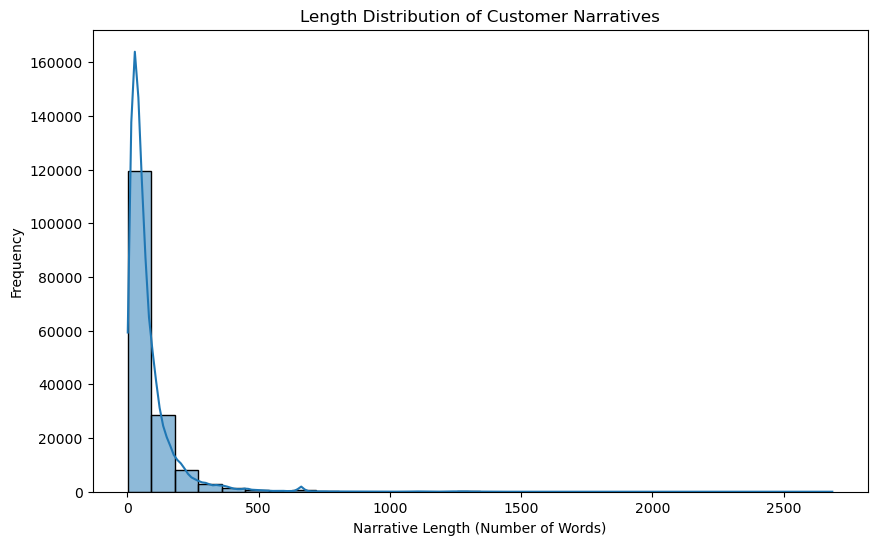

In [40]:
import seaborn as sns

# Compute the length of each narrative (in terms of number of words)
df['narrative_length'] = df['narrative'].apply(lambda x: len(x.split()))

# Plot the distribution of narrative lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=30, kde=True)
plt.title('Length Distribution of Customer Narratives')
plt.xlabel('Narrative Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

 $\color{blue}{\text{Performing Text processing}}$

In [41]:
!pip install contractions

In [42]:
import contractions

def expansion(text):
    words = contractions.fix(text)
    return words


#Run the function
df['narrative'] = df['narrative'].apply(expansion)
df['narrative']

0         purchase order day shipping amount receive pro...
1         forwarded message date tue subject please inve...
2         forwarded message cc sent friday pdt subject f...
3         payment history missing credit report speciali...
4         payment history missing credit report made mis...
                                ...                        
162406                                                 name
162407                                                 name
162408                                                 name
162409                                                 name
162410                                                 name
Name: narrative, Length: 162411, dtype: object

In [43]:
import re

def remove_numbers_punctuation(text):
    return re.sub('[^a-zA-Z.,!:;]', ' ', text)

df['narrative'] = df['narrative'].apply(remove_numbers_punctuation)
df['narrative']

0         purchase order day shipping amount receive pro...
1         forwarded message date tue subject please inve...
2         forwarded message cc sent friday pdt subject f...
3         payment history missing credit report speciali...
4         payment history missing credit report made mis...
                                ...                        
162406                                                 name
162407                                                 name
162408                                                 name
162409                                                 name
162410                                                 name
Name: narrative, Length: 162411, dtype: object

 $\color{blue}{\text{Converting to lower case:}}$

In [44]:
def remove_capitalization(text):
  lower_text= text.lower()
  return lower_text

df['narrative'] = df['narrative'].apply(lambda x: remove_capitalization(x))
df.narrative[0:10]

0    purchase order day shipping amount receive pro...
1    forwarded message date tue subject please inve...
2    forwarded message cc sent friday pdt subject f...
3    payment history missing credit report speciali...
4    payment history missing credit report made mis...
5    payment history missing credit report made mis...
6    va date complaint experian credit bureau invol...
7    account reported abbreviated name full name se...
8    account reported abbreviated name full name se...
9    usdoexxxx account reported abbreviated name fu...
Name: narrative, dtype: object

In [45]:
# Function for removing double spaces
def remove_double_spaces(text):
    return ' '.join(text.split())

# Apply double space removal to the 'narrative' column
df['narrative'] = df['narrative'].apply(remove_double_spaces)
df['narrative']

# Display the cleaned narratives
print(df['narrative'].head())

0    purchase order day shipping amount receive pro...
1    forwarded message date tue subject please inve...
2    forwarded message cc sent friday pdt subject f...
3    payment history missing credit report speciali...
4    payment history missing credit report made mis...
Name: narrative, dtype: object


 $\color{blue}{\text{Tokenization:}}$

In [46]:
from nltk.corpus import stopwords

#remove stop words
stop = stopwords.words('english')
df['Clean_narrative'] = df['narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Clean_narrative']

0         purchase order day shipping amount receive pro...
1         forwarded message date tue subject please inve...
2         forwarded message cc sent friday pdt subject f...
3         payment history missing credit report speciali...
4         payment history missing credit report made mis...
                                ...                        
162406                                                 name
162407                                                 name
162408                                                 name
162409                                                 name
162410                                                 name
Name: Clean_narrative, Length: 162411, dtype: object

In [47]:
import nltk

nltk.download('punkt')
def tokenize_text(text):
    words = nltk.word_tokenize(text)
    return words

df['Clean_narrative'] = df['narrative'].apply(lambda x: tokenize_text(x))
df['Clean_narrative']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prangyaparida/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0         [purchase, order, day, shipping, amount, recei...
1         [forwarded, message, date, tue, subject, pleas...
2         [forwarded, message, cc, sent, friday, pdt, su...
3         [payment, history, missing, credit, report, sp...
4         [payment, history, missing, credit, report, ma...
                                ...                        
162406                                               [name]
162407                                               [name]
162408                                               [name]
162409                                               [name]
162410                                               [name]
Name: Clean_narrative, Length: 162411, dtype: object

In [48]:
df.head()

,product,narrative,narrative_length,Clean_narrative
0,credit_card,purchase order day shipping amount receive pro...,230,"[purchase, order, day, shipping, amount, recei..."
1,credit_card,forwarded message date tue subject please inve...,132,"[forwarded, message, date, tue, subject, pleas..."
2,retail_banking,forwarded message cc sent friday pdt subject f...,173,"[forwarded, message, cc, sent, friday, pdt, su..."
3,credit_reporting,payment history missing credit report speciali...,131,"[payment, history, missing, credit, report, sp..."
4,credit_reporting,payment history missing credit report made mis...,123,"[payment, history, missing, credit, report, ma..."


In [49]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemma = WordNetLemmatizer()

def lemmatization(text):
    return [lemma.lemmatize(word=w, pos='v') for w in text]

#Code to lemmatize
df['Clean_narrative'] = df['Clean_narrative'].apply(lemmatization)
df['Clean_narrative']

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prangyaparida/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0         [purchase, order, day, ship, amount, receive, ...
1         [forward, message, date, tue, subject, please,...
2         [forward, message, cc, send, friday, pdt, subj...
3         [payment, history, miss, credit, report, speci...
4         [payment, history, miss, credit, report, make,...
                                ...                        
162406                                               [name]
162407                                               [name]
162408                                               [name]
162409                                               [name]
162410                                               [name]
Name: Clean_narrative, Length: 162411, dtype: object

 $\color{blue}{\text{Identifying the most common words in the narratives:}}$

In [50]:
from collections import Counter

# Initialize an empty list to store all tokens
all_tokens = []

# Tokenize each clean narrative
for narrative_list in df['Clean_narrative']:
    for narrative in narrative_list:
        # Tokenize the narrative and extend the list of tokens
        all_tokens.extend(narrative.split())

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common(10)  # Change the number if you want more or fewer common words

# Display the most common words
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq} occurrences")

Most common words:
account: 326912 occurrences
credit: 321654 occurrences
report: 306822 occurrences
information: 143538 occurrences
payment: 127725 occurrences
call: 109710 occurrences
receive: 99290 occurrences
send: 86733 occurrences
pay: 86657 occurrences
dispute: 85084 occurrences


 $\color{blue}{\text{Identifying whether certain products or services receive more complaints than others:}}$

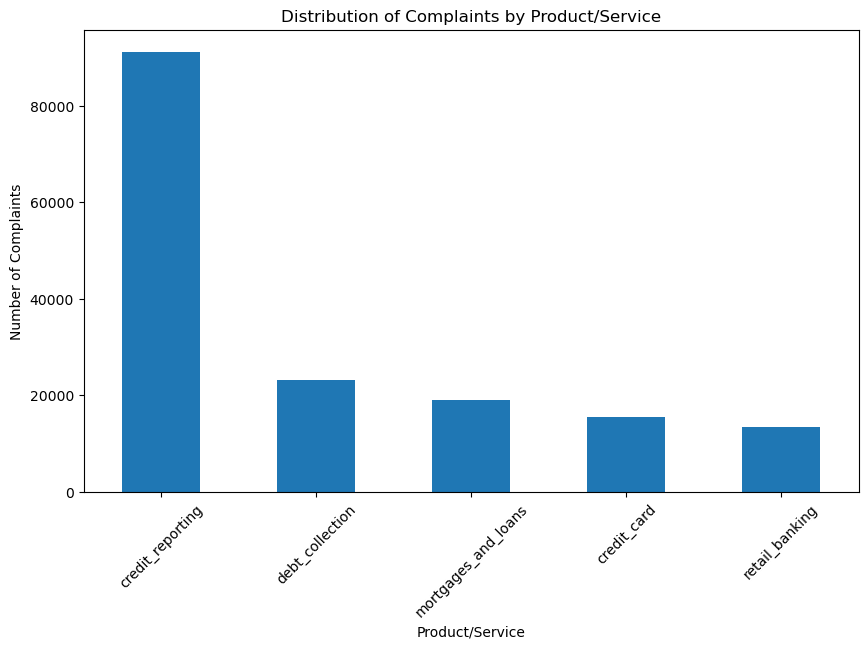

In [51]:
# Count the number of complaints for each product
product_complaint_counts = df['product'].value_counts()

# Plot the distribution of complaints by product
plt.figure(figsize=(10, 6))
product_complaint_counts.plot(kind='bar')
plt.title('Distribution of Complaints by Product/Service')
plt.xlabel('Product/Service')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

In [52]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [53]:
df.head()

,product,narrative,narrative_length,Clean_narrative
0,credit_card,purchase order day shipping amount receive pro...,230,"[purchase, order, day, ship, amount, receive, ..."
1,credit_card,forwarded message date tue subject please inve...,132,"[forward, message, date, tue, subject, please,..."
2,retail_banking,forwarded message cc sent friday pdt subject f...,173,"[forward, message, cc, send, friday, pdt, subj..."
3,credit_reporting,payment history missing credit report speciali...,131,"[payment, history, miss, credit, report, speci..."
4,credit_reporting,payment history missing credit report made mis...,123,"[payment, history, miss, credit, report, make,..."


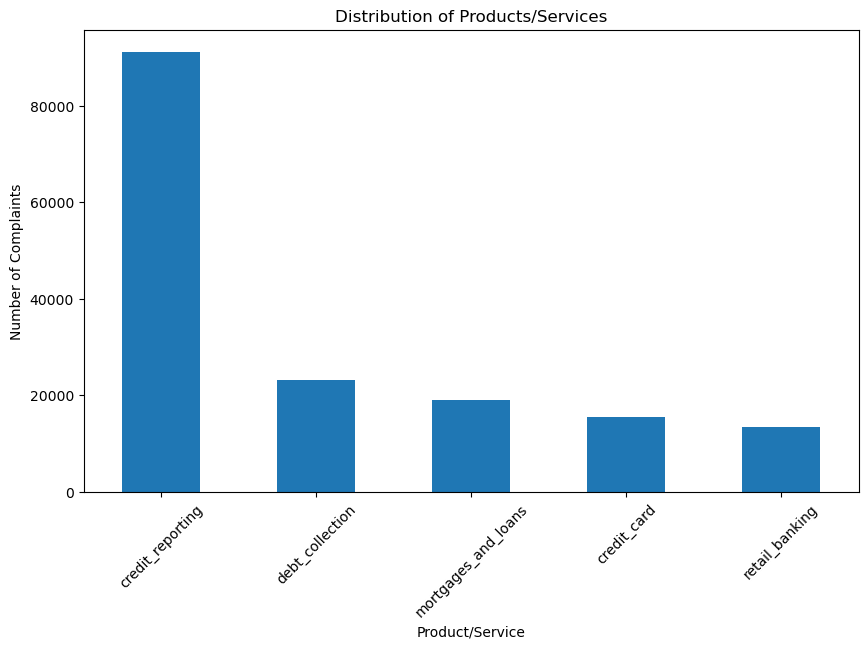

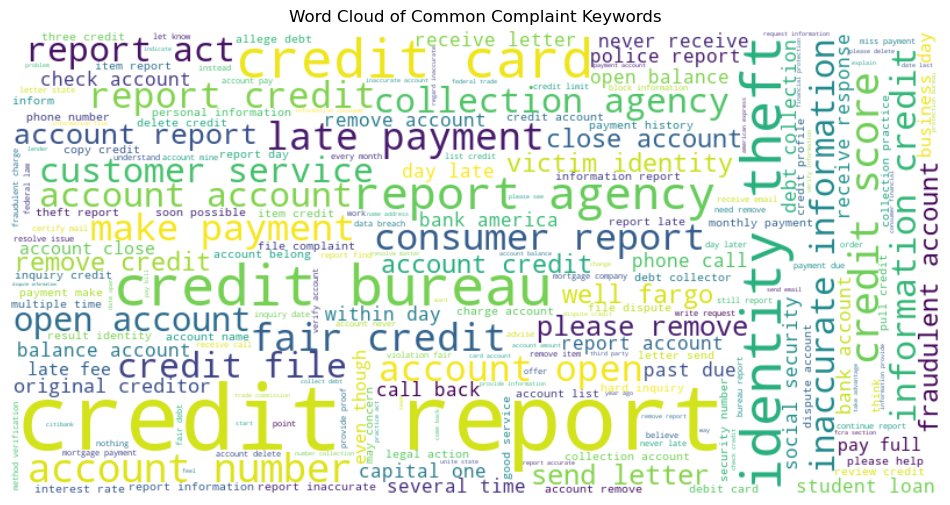

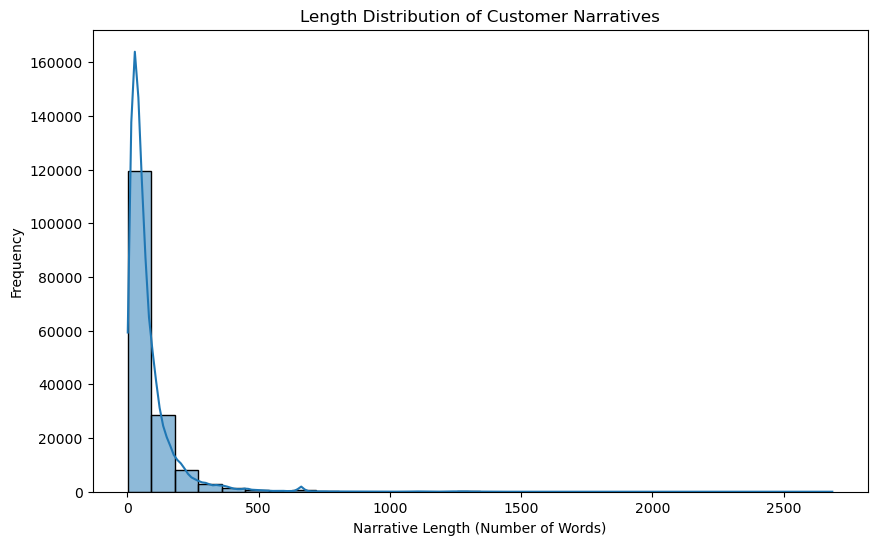

In [54]:
from wordcloud import WordCloud
import itertools

# Distribution of Products
plt.figure(figsize=(10, 6))
df['product'].value_counts().plot(kind='bar')
plt.title('Distribution of Products/Services')
plt.xlabel('Product/Service')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

# Combine all clean narratives into a single string
cleannarratives = ' '.join(df['Clean_narrative'].apply(lambda x: ' '.join(x)))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleannarratives)
# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Complaint Keywords')
plt.show()


# Histogram of Narrative Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=30, kde=True)
plt.title('Length Distribution of Customer Narratives')
plt.xlabel('Narrative Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

$\color{blue}{\text{Encoding the labels in preparation for training:}}$

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the product categories
df['encoded_product'] = label_encoder.fit_transform(df['product'])

# Display the encoded product categories
print(df[['product', 'encoded_product']].head())

# Optionally, you can also get the mapping of encoded labels to original labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Mapping:")
print(label_mapping)

            product  encoded_product
0       credit_card                0
1       credit_card                0
2    retail_banking                4
3  credit_reporting                1
4  credit_reporting                1

Label Mapping:
{'credit_card': 0, 'credit_reporting': 1, 'debt_collection': 2, 'mortgages_and_loans': 3, 'retail_banking': 4}


$\color{blue}{\text{Checking for class imbalance}}$

Class Distribution:
encoded_product
1    0.561366
2    0.142527
3    0.116926
0    0.095843
4    0.083338
Name: proportion, dtype: float64


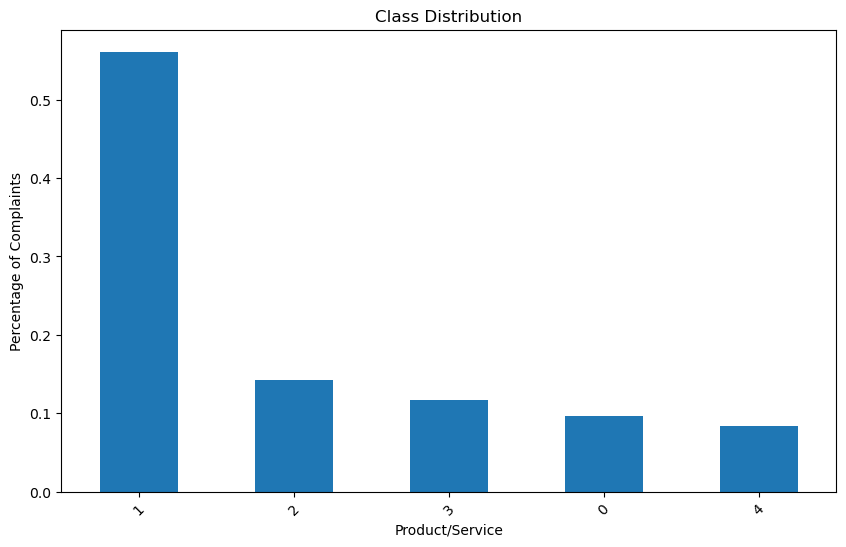

In [56]:
# Calculate class distribution
class_distribution = df['encoded_product'].value_counts(normalize=True)

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Product/Service')
plt.ylabel('Percentage of Complaints')
plt.xticks(rotation=45)
plt.show()


In [57]:
class_proportions = [0.561366, 0.142527, 0.116926, 0.095843, 0.083338]
imbalance_ratio = max(class_proportions) / min(class_proportions)
print("Class Imbalance Ratio:", imbalance_ratio)

Class Imbalance Ratio: 6.736014783172143


$\color{blue}{\text{Conclusion:}}$ Class 1 (Credit reporting) represents the majority, around 56.14% of the dataset.

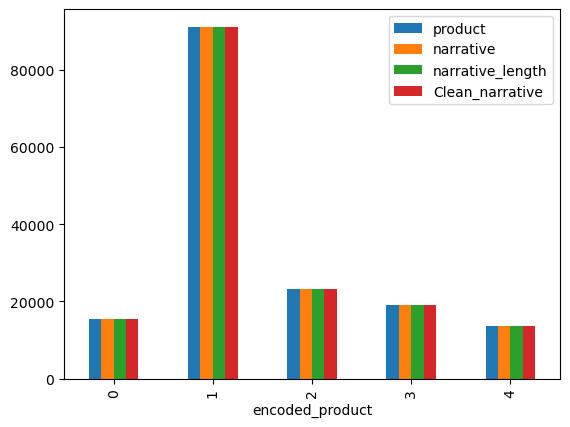

In [58]:
# Balance of data
df.groupby('encoded_product').count().plot(kind='bar')
plt.show()

In [59]:
# set value counts 
df.groupby('encoded_product').count()

,product,narrative,narrative_length,Clean_narrative
encoded_product,,,,
0,15566,15566,15566,15566
1,91172,91172,91172,91172
2,23148,23148,23148,23148
3,18990,18990,18990,18990
4,13535,13535,13535,13535


In [60]:
 # Randomly selecting 10000 indices in classes with low value count
import numpy as np

to_add_1 = np.random.choice(df[df['product']=='credit_card'].index,size = 10000,replace=False)   
to_add_2 = np.random.choice(df[df['product']=='debt_collection'].index,size = 10000,replace=False) 
to_add_3 = np.random.choice(df[df['product']=='mortgages_and_loans'].index,size = 10000,replace=False)  
to_add_4 = np.random.choice(df[df['product']=='retail_banking'].index,size=10000,replace=False)

# Indices to be added
to_add = np.concatenate((to_add_1, to_add_2, to_add_3, to_add_4 ))
len(to_add)

40000

In [61]:
# Forming a dataframe for randomly selected indices
df_sample = df[df.index.isin(to_add)]
df_sample 

,product,narrative,narrative_length,Clean_narrative,encoded_product
1,credit_card,forwarded message date tue subject please inve...,132,"[forward, message, date, tue, subject, please,...",0
11,credit_card,called request new york state covid relief pla...,28,"[call, request, new, york, state, covid, relie...",0
12,credit_card,capital one secured credit account opened name...,18,"[capital, one, secure, credit, account, open, ...",0
14,debt_collection,collection agency system inc mn phone sent let...,65,"[collection, agency, system, inc, mn, phone, s...",2
15,mortgages_and_loans,current loan provident funding applied refinan...,62,"[current, loan, provident, fund, apply, refina...",3
...,...,...,...,...,...
162403,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...,16,"[zillow, home, loan, nmls, nmls, actual, quote...",3
162404,debt_collection,zuntafi sent notice willing settle defaulted s...,68,"[zuntafi, send, notice, will, settle, default,...",2
162406,debt_collection,name,1,[name],2
162407,credit_card,name,1,[name],0


In [62]:
# Concatenating replicated df to orinigal df
df = pd.concat([df, df_sample])
df['product'].value_counts()

product
credit_reporting       91172
debt_collection        33148
mortgages_and_loans    28990
credit_card            25566
retail_banking         23535
Name: count, dtype: int64

$\color{blue}{\text{Remark:}}$ Increased the counts of the minor classes by oversampling, by adding 10,000 additional samples to each of the minor classes.

In [63]:
print(df.columns)
print(df.head(10))

Index(['product', 'narrative', 'narrative_length', 'Clean_narrative',
       'encoded_product'],
      dtype='object')
            product                                          narrative  \
0       credit_card  purchase order day shipping amount receive pro...   
1       credit_card  forwarded message date tue subject please inve...   
2    retail_banking  forwarded message cc sent friday pdt subject f...   
3  credit_reporting  payment history missing credit report speciali...   
4  credit_reporting  payment history missing credit report made mis...   
5  credit_reporting  payment history missing credit report made mis...   
6  credit_reporting  va date complaint experian credit bureau invol...   
7  credit_reporting  account reported abbreviated name full name se...   
8  credit_reporting  account reported abbreviated name full name se...   
9  credit_reporting  usdoexxxx account reported abbreviated name fu...   

   narrative_length                                    Clean_narra

# $\color{red}{\text{Bi-LSTM Model Development}}$

 $\color{blue}{\text{Splitting the dataset into training and validation sets (e.g., 80/20 split):}}$

In [65]:
# Splitting data into train and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(np.array(df['Clean_narrative']),
    np.array(df['encoded_product']), test_size=0.2, random_state=42)

print("Shape of train data:", X_train.shape)
print("Shape of test data:", X_val.shape)

Shape of train data: (161928,)
Shape of test data: (40483,)


$\color{blue}{\text{Preprocess the text data for model input (tokenization, padding, word embeddings):}}$

In [67]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [68]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-03-25 23:11:56.839536: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [69]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)


In [70]:
# Padding
maxlen = 100  # Assuming maximum length of sequences as 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen, padding='post')
X_val_pad.shape

(40483, 100)

In [71]:
X_train_pad.shape

(161928, 100)

In [72]:
# Word Embeddings
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for reserved 0 index
embedding_dim = 100  # Dimensionality of the dense embedding
# You can use pre-trained word embeddings like GloVe or train embeddings from scratch
vocab_size

37685

In [73]:
# Building the Bi-LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # Remove input_length parameter
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),  # Add dropout layer to prevent overfitting
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(len(df['encoded_product'].unique()), activation='softmax')  # Assuming multi-class classification
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.build(X_train_pad.shape)  
model.summary()

# Train the model
history = model.fit(X_train_pad, Y_train, epochs=5, batch_size=32, validation_data=(X_val_pad, Y_val))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (161928, 100, 100)     │     3,768,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (161928, 100, 128)     │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (161928, 100, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (161928, 128)          │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (161928, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (161928, 5)            │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,952,441 (15.08 MB)

 Trainable params: 3,952,441 (15.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5061/5061 ━━━━━━━━━━━━━━━━━━━━ 1580s 310ms/step - accuracy: 0.7769 - loss: 0.6396 - val_accuracy: 0.8526 - val_loss: 0.4396
Epoch 2/5
5061/5061 ━━━━━━━━━━━━━━━━━━━━ 1546s 305ms/step - accuracy: 0.8666 - loss: 0.3947 - val_accuracy: 0.8541 - val_loss: 0.4251
Epoch 3/5
5061/5061 ━━━━━━━━━━━━━━━━━━━━ 1407s 278ms/step - accuracy: 0.8872 - loss: 0.3351 - val_accuracy: 0.8729 - val_loss: 0.3739
Epoch 4/5
5061/5061 ━━━━━━━━━━━━━━━━━━━━ 1635s 312ms/step - accuracy: 0.9021 - loss: 0.2893 - val_accuracy: 0.8824 - val_loss: 0.3528
Epoch 5/5
5061/5061 ━━━━━━━━━━━━━━━━━━━━ 1444s 285ms/step - accuracy: 0.9178 - loss: 0.2472 - val_accuracy: 0.8854 - val_loss: 0.3494


$\color{blue}{\text{Conclusion:}}$ The model showed consistent improvement in both accuracy and loss metrics, reaching a training accuracy of 91.78% and a training loss of 0.2472 by the fifth epoch. The validation accuracy also showed enhancement, reaching 88.54%, while the validation loss decreased from 0.4396 to 0.3494. It indicates effective learning and good generalization on the unseen data.

In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (161928, 100, 100)     │     3,768,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (161928, 100, 128)     │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (161928, 100, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (161928, 128)          │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (161928, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (161928, 5)            │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,857,325 (45.23 MB)

 Trainable params: 3,952,441 (15.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,904,884 (30.15 MB)

# $\color{red}{\text{Model Evaluation, Interpretation & Comparison:}}$

$\color{blue}{\text{Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score.}}$

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Y_pred_1 = model.predict(X_val_pad)
Y_pred = np.argmax(Y_pred_1, axis=1)

# Print precision, recall, and f1 scores
precision = precision_score(Y_val, Y_pred, average="macro")
recall = recall_score(Y_val, Y_pred, average="macro")
f1 = f1_score(Y_val, Y_pred, average="macro")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate accuracy 
accuracy = accuracy_score(Y_val, Y_pred)
print('Accuracy: %.2f' % (accuracy * 100))


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 98s 77ms/step
Precision: 0.870123577635252
Recall: 0.873732573529615
F1 Score: 0.871666626427405
Accuracy: 88.54


$\color{blue}{\text{Conclusion:}}$ With 1266 instances, the model achieved a precision of 87.01%, indicating a high proportion of correctly predicted positive instances among all instances predicted as positive. The recall score of 87.37% highlights the model's capability to identify a large portion of actual positive instances from the total number of positive instances in the dataset. The F1 score of 87.16%, reflects a balanced performance between precision and recall. Additionally, the overall accuracy of 88.54% emphasizes the model's ability to correctly classify instances across all classes. These metrics collectively show a robust performance of the Bi-LSTM model with a good balance among precision, recall, and accuracy.

$\color{blue}{\text{Analyzing the confusion matrix:}}$

Text(95.72222222222221, 0.5, 'Truth')

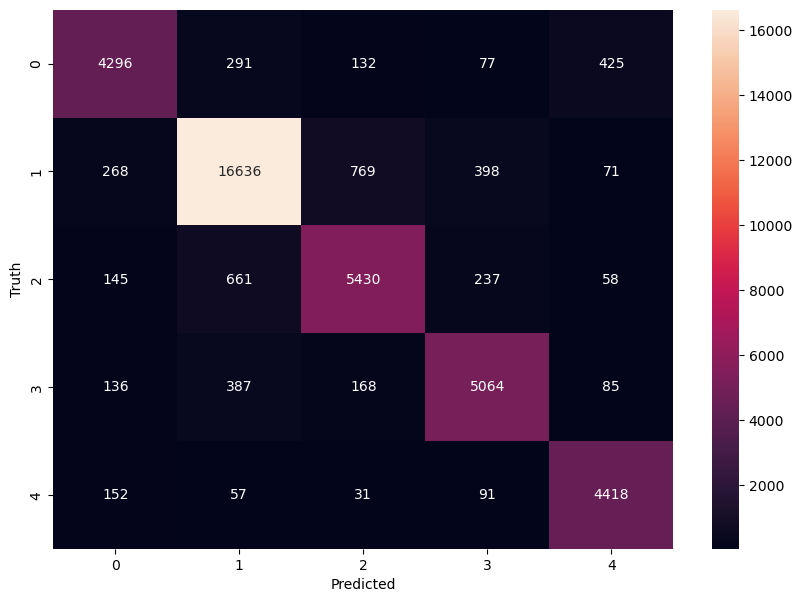

In [76]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=Y_val, predictions=Y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

$\color{blue}{\text{Conclusion:}}$ The model performs well in correctly classifying instances for 'credit_reporting' and 'debt_collection'. Additionally, there are considerable misclassifications, with higher counts in 'credit_reporting' and 'debt_collection' compared to 'mortgages_and_loans' and 'retail_banking'.

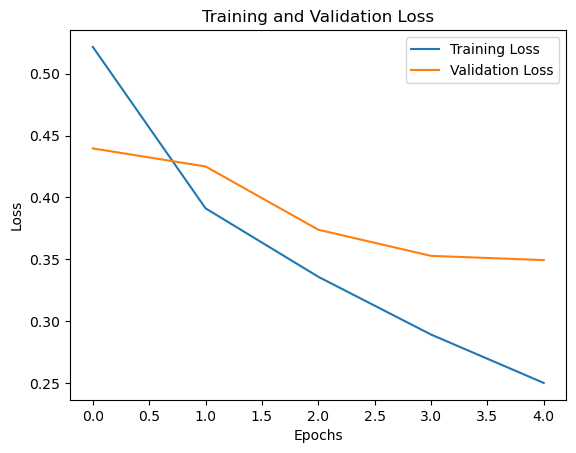

In [77]:
# Visualize training and test loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

$\color{blue}{\text{Conclusion:}}$ A considerable drop in training loss tells that the model is effectively learning from the training data and is fitting the training data quite well. A decrease in validation loss indicates the model's effective learning and good generalization on the unseen data.

In [80]:
# Build and evaluate traditional classifiers (Naïve Bayes & Random Forest)
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Naïve Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_pad, Y_train)
nb_pred = nb_classifier.predict(X_val_pad)
nb_accuracy = accuracy_score(Y_val, nb_pred)
print("Naïve Bayes Accuracy:", nb_accuracy)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_pad, Y_train)
rf_pred = rf_classifier.predict(X_val_pad)
rf_accuracy = accuracy_score(Y_val, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Naïve Bayes Accuracy: 0.36126275226638344
Random Forest Accuracy: 0.8186399229306128


$\color{blue}{\text{Conclusion:}}$ The Naïve Bayes classifier achieved an accuracy of 36.12%, while the Random Forest classifier achieved an accuracy of 81.86%. The Bi-LSTM model demonstrates better performance compared to the above two traditional classifiers with an accuracy of 88.54%.